In [2]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

El cometa Halley alcanzó el último perihelio (su punto de acercamiento más cercano al Sol, el Sol en el origen) el 9 de febrero de 1986. Sus componentes de posición y velocidad en ese momento fueron:

p0=(0.325514,−0.459460,0.166229),            v0=(−9.096111,−6.916686,−1.305721).

respectivamente. Aquí la posición se mide en UA (unidades astronómicas), en las cuales la unidad de distancia corresponde al semi-eje mayor del planeta Tierra, y el tiempo se mide en años. El vector p(t) describe la posición p(t) = (x(t), y(t), z(t)) del cometa.

Las ecuaciones de movimiento del cometa son:

d^2x/dt^2=-μx/r^3,	d^2ydt^2=-μy/r^3,	d^2z/dt^2=-μz/r^3,

donde

μ=4π^2	  y	  r=raiz(x^2+y^2+z^2).

a. Resolver las ecuaciones mediante algoritmos numéricos. Graficar las proyecciones xy, xz y yz de la trayectoria del cometa (si lo desea, puede graficar una trayectoria completa del cometa mediante una gráfica 3D).

In [3]:
# Implementación Runge-Kutta 4
def runge_kutta_4(f, y0, t0, tf, h):
  t = np.arange(t0, tf + h, h)
  y = np.zeros((len(t), len(y0)))
  y[0] = y0
  
  for i in range(1, len(t)):
      ti = t[i - 1]
      yi = y[i - 1]
      
      k1 = f(ti, yi)
      k2 = f(ti + h/2, yi + h * (k1/2))
      k3 = f(ti + h/2, yi + h * (k2/2))
      k4 = f(ti + h, yi + h * k3)
      
      y[i] = yi + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
  
  return t, y

In [4]:
mu = 4 * np.pi**2

# Sistema EDO
def halley(t, y):
  r = np.sqrt(y[0]**2 + y[1]**2 + y[2]**2)
  ax = -mu * y[0] / r**3
  ay = -mu * y[1] / r**3
  az = -mu * y[2] / r**3
  return np.array([y[3], y[4], y[5], ax, ay, az])

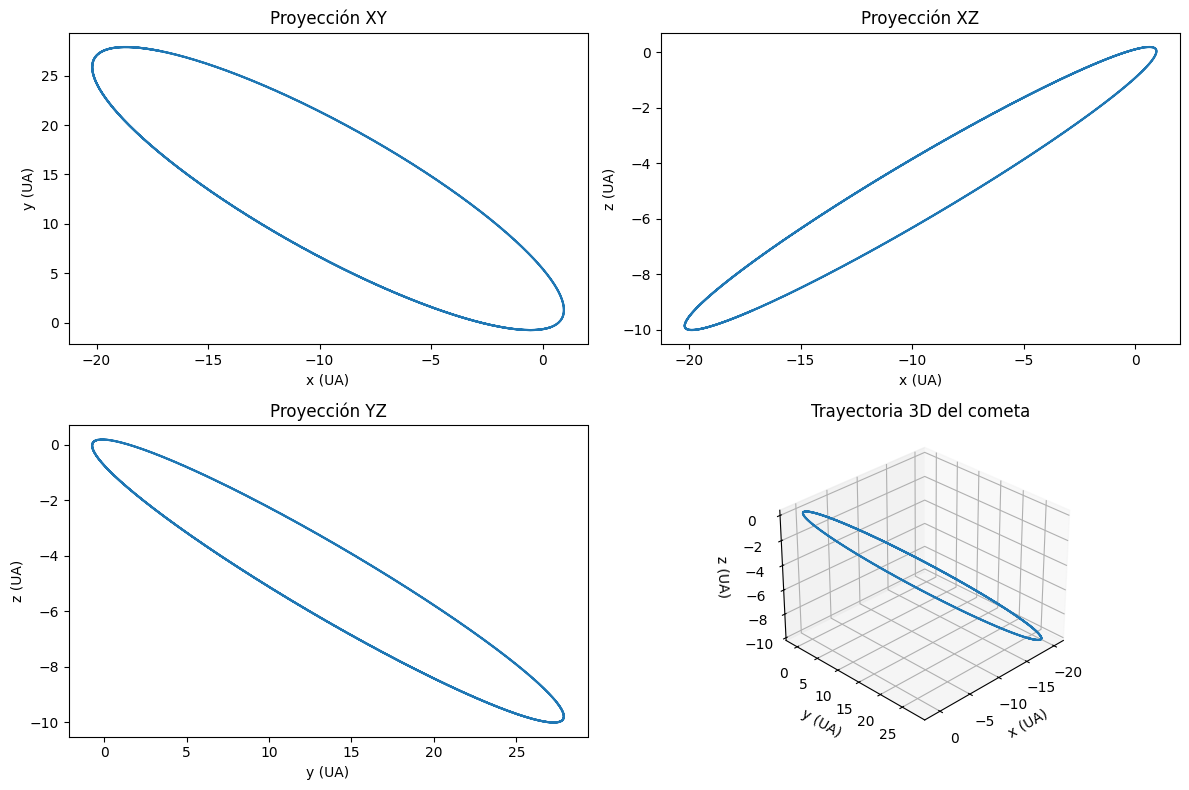

In [5]:
p0 = np.array([0.325514, -0.459460, 0.166229])
v0 = np.array([-9.096111, -6.916686, -1.305721])

# y = [x, y, z, vx, vy, vz]
y0 = np.concatenate([p0, v0])

t0 = 0  # Tiempo inicial
tf = 200  # Tiempo final
h = 0.01  # Tamaño de paso

t_sol, y_sol = runge_kutta_4(halley, y0, t0, tf, h)
x, y, z = y_sol[:, 0], y_sol[:, 1], y_sol[:, 2]

plt.figure(figsize=(12, 8))
# xy
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.title('Proyección XY')

# xz
plt.subplot(2, 2, 2)
plt.plot(x, z)
plt.xlabel('x (UA)')
plt.ylabel('z (UA)')
plt.title('Proyección XZ')

# yz
plt.subplot(2, 2, 3)
plt.plot(y, z)
plt.xlabel('y (UA)')
plt.ylabel('z (UA)')
plt.title('Proyección YZ')

# Trayectoria completa
ax = plt.subplot(2, 2, 4, projection='3d')
ax.plot3D(x, y, z)
ax.set_xlabel('x (UA)')
ax.set_ylabel('y (UA)')
ax.set_zlabel('z (UA)')
ax.set_title('Trayectoria 3D del cometa')

ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

b. Estimar la posición y velocidad del cometa para el 9 de febrero de 2086, y de 2186.
(t = 100 y 200 años).

In [6]:
index_100 = np.where(t_sol == 100)[0][0]
index_200 = np.where(t_sol == 200)[0][0]

pos_100 = y_sol[index_100, :3]  # Posición en t = 100
vel_100 = y_sol[index_100, 3:]  # Velocidad en t = 100

pos_200 = y_sol[index_200, :3]  # Posición en t = 200
vel_200 = y_sol[index_200, 3:]  # Velocidad en t = 200

print(f"Posición del cometa en t = 100 años: {pos_100} UA")
print(f"Velocidad del cometa en t = 100 años: {vel_100} UA/año")

print(f"Posición del cometa en t = 200 años: {pos_200} UA")
print(f"Velocidad del cometa en t = 200 años: {vel_200} UA/año")

Posición del cometa en t = 100 años: [-19.84490276  23.56364952  -9.38239428] UA
Velocidad del cometa en t = 100 años: [-0.12434545  0.47169782 -0.11356382] UA/año
Posición del cometa en t = 200 años: [-17.15490663  27.47483738  -9.31161824] UA
Velocidad del cometa en t = 200 años: [ 0.32643984 -0.14795328  0.11382631] UA/año


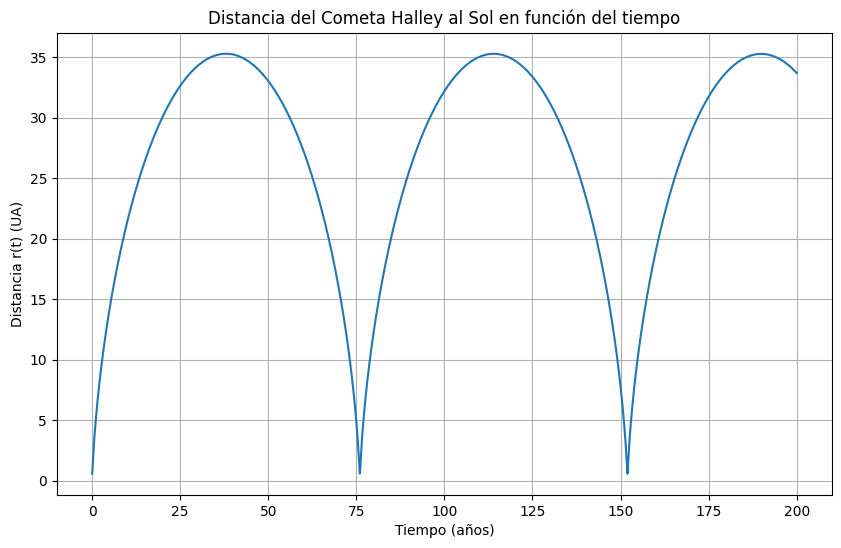

Períodos estimados (años): [75.97]
Período medio del cometa Halley: 75.97000000000001 años


In [7]:
r_t = np.sqrt(y_sol[:, 0]**2 + y_sol[:, 1]**2 + y_sol[:, 2]**2)

plt.figure(figsize=(10, 6))
plt.plot(t_sol, r_t)
plt.xlabel('Tiempo (años)')
plt.ylabel('Distancia r(t) (UA)')
plt.title('Distancia del Cometa Halley al Sol en función del tiempo')
plt.grid(True)
plt.show()

peaks, _ = find_peaks(-r_t)
peak_times = t_sol[peaks]

periods = np.diff(peak_times)
average_period = np.mean(periods)

print(f"Períodos estimados (años): {periods}")
print(f"Período medio del cometa Halley: {average_period} años")